# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
!wget https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv

--2022-02-16 00:40:14--  https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘raw.githubusercontent.com’


In [3]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop('Unnamed: 0', axis=1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
x = data['TV'].values.reshape(-1, 1)
y = data['Sales'].values.reshape(-1, 1)

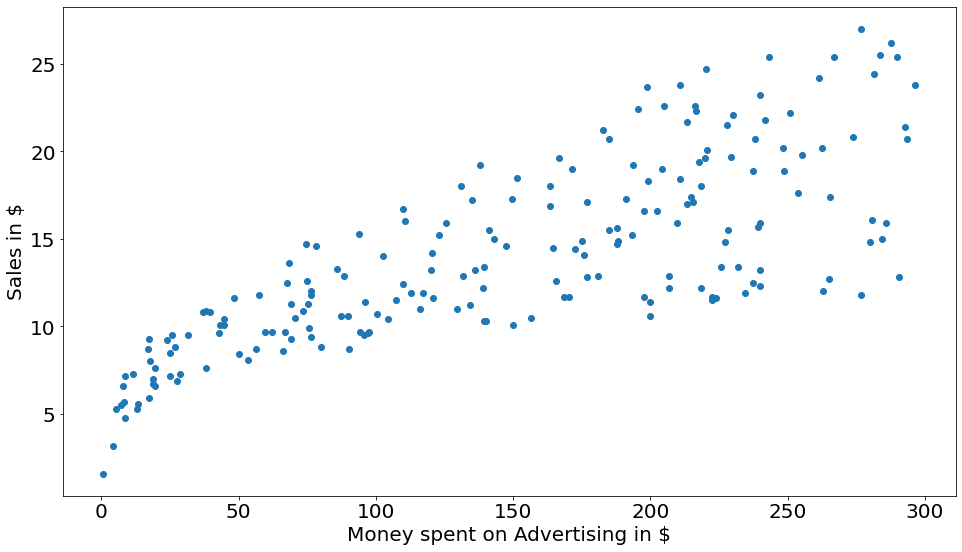

In [6]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=20)
plt.scatter(x, y)
plt.xlabel('Money spent on Advertising in $')
plt.ylabel('Sales in $')
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [8]:
lin_reg = LinearRegression()
lin_reg_model = lin_reg.fit(x_train, y_train)
y_pred = lin_reg_model.predict(x_test)

In [9]:
print("Slope= ", lin_reg_model.coef_[0][0])
print("Intercept= ", lin_reg_model.intercept_[0])
print("The linear model is y = {:.5} + {:.5}x".format(lin_reg_model.intercept_[0], lin_reg_model.coef_[0][0]))

Slope=  0.04812204162796224
Intercept=  6.923519536059554
The linear model is y = 6.9235 + 0.048122x


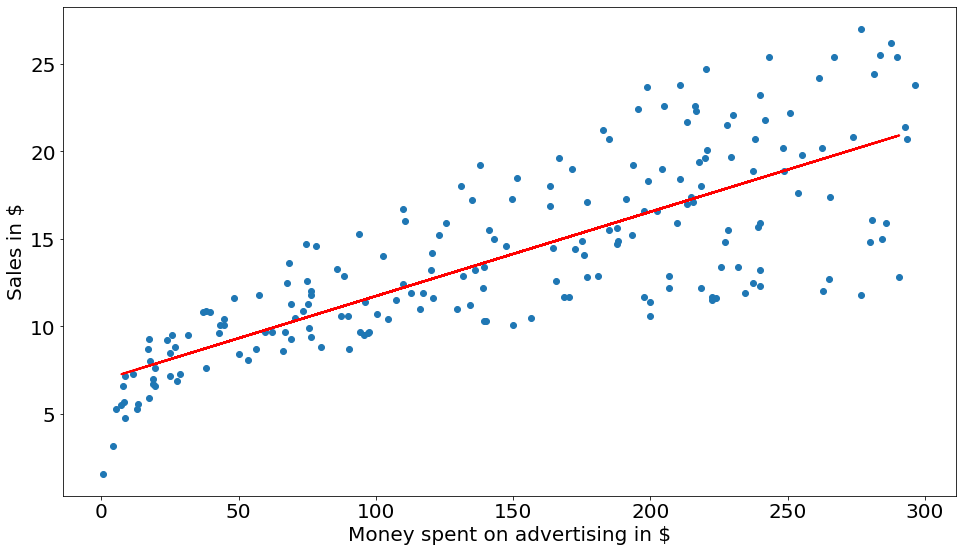

In [10]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=20)
plt.scatter(x, y)
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Money spent on advertising in $')
plt.ylabel('Sales in $')
plt.show()

In [11]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error= ", rmse)

Root Mean Squared Error=  3.251316261863333


In [12]:
r2 = r2_score(y_test, y_pred)
print("R2 score= ", r2)

R2 score=  0.575061860494331


# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [15]:
log_reg = LogisticRegression(random_state=0, solver='liblinear')
log_reg_model = log_reg.fit(x, y)

In [16]:
print(log_reg_model.classes_)

[0 1]


In [17]:
print(log_reg_model.coef_)

[[0.51491375]]


In [18]:
print(log_reg_model.intercept_)

[-1.04608067]


In [19]:
print(log_reg_model.predict_proba(x))

[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]


In [20]:
print(log_reg_model.predict(x))

[0 0 0 1 1 1 1 1 1 1]


In [21]:
print(log_reg_model.score(x, y))

0.9


In [22]:
cm = confusion_matrix(y, log_reg_model.predict(x))

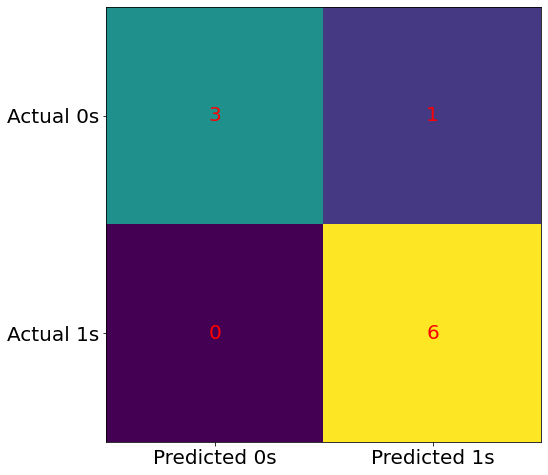

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [24]:
print(classification_report(y, log_reg_model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

